<a href="https://colab.research.google.com/github/mr-nahash/drug-discovery-antipsychotics-D2DR/blob/main/CDD_ML_Part_2_Sigma1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Fernando Matinez

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

## **Load bioactivity data**

we are going to download my file already preprocessed from part 1

In [ ]:
import pandas as pd

In [ ]:
! gdown --id 1-Qp1xUx_NYHgNk4h3wg2SnVlQckoTnS2
df = pd.read_csv('sigma1_bioactivity_data_preprocessed.csv')
df

Downloading...
From: https://drive.google.com/uc?id=1-Qp1xUx_NYHgNk4h3wg2SnVlQckoTnS2
To: /content/sigma1_bioactivity_data_preprocessed.csv
100% 72.6k/72.6k [00:00<00:00, 60.8MB/s]


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL67010,C/C(=N\C1CCCCC1)NC12CC3CC(CC(C3)C1)C2,72.00,active
1,CHEMBL542638,C/C(=N\C12CC3CC(CC(C3)C1)C2)Nc1ccccc1C.Cl,6.00,active
2,CHEMBL544054,C/C(=N\C1CCCCC1)Nc1ccccc1C.Cl,9.00,active
3,CHEMBL67388,C/C(=N\C12CC3CC(CC(C3)C1)C2)NC12CC3CC(CC(C3)C1)C2,16.00,active
4,CHEMBL538754,C/C(=N\c1ccccc1C)Nc1ccccc1C.Cl,15.00,active
...,...,...,...,...
1170,CHEMBL60542,CC(C)=CCN1CC[C@]2(C)c3cc(O)ccc3C[C@H]1[C@H]2C,8.24,NaN
1171,CHEMBL177952,COc1ccc2c(c1)CCCC2CCCCN1CCC(C)CC1,12.10,NaN
1172,CHEMBL176941,COc1ccc2c(CCCCN3CCC(C)CC3)cccc2c1,10.60,NaN
1173,CHEMBL60542,CC(C)=CCN1CC[C@]2(C)c3cc(O)ccc3C[C@H]1[C@H]2C,7.59,NaN


Remove NA in **SMILES**

In [ ]:
 df2 = df[df.canonical_smiles.notna()]

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
   
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["M Weight","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df2.canonical_smiles)


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,M Weight,LogP,NumHDonors,NumHAcceptors
0,274.452,4.29590,1.0,1.0
1,318.892,5.21592,1.0,1.0
2,266.816,4.57982,1.0,1.0
3,326.528,4.93200,1.0,1.0
4,274.795,4.88724,1.0,1.0
...,...,...,...,...
1051,285.431,3.88260,1.0,2.0
1052,315.501,5.01730,0.0,2.0
1053,311.469,4.90300,0.0,2.0
1054,285.431,3.88260,1.0,2.0


In [ ]:
df2

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL67010,C/C(=N\C1CCCCC1)NC12CC3CC(CC(C3)C1)C2,72.00,active
1,CHEMBL542638,C/C(=N\C12CC3CC(CC(C3)C1)C2)Nc1ccccc1C.Cl,6.00,active
2,CHEMBL544054,C/C(=N\C1CCCCC1)Nc1ccccc1C.Cl,9.00,active
3,CHEMBL67388,C/C(=N\C12CC3CC(CC(C3)C1)C2)NC12CC3CC(CC(C3)C1)C2,16.00,active
4,CHEMBL538754,C/C(=N\c1ccccc1C)Nc1ccccc1C.Cl,15.00,active
...,...,...,...,...
1170,CHEMBL60542,CC(C)=CCN1CC[C@]2(C)c3cc(O)ccc3C[C@H]1[C@H]2C,8.24,NaN
1171,CHEMBL177952,COc1ccc2c(c1)CCCC2CCCCN1CCC(C)CC1,12.10,NaN
1172,CHEMBL176941,COc1ccc2c(CCCCN3CCC(C)CC3)cccc2c1,10.60,NaN
1173,CHEMBL60542,CC(C)=CCN1CC[C@]2(C)c3cc(O)ccc3C[C@H]1[C@H]2C,7.59,NaN


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df2,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,M Weight,LogP,NumHDonors,NumHAcceptors
0,CHEMBL67010,C/C(=N\C1CCCCC1)NC12CC3CC(CC(C3)C1)C2,72.00,active,274.452,4.29590,1.0,1.0
1,CHEMBL542638,C/C(=N\C12CC3CC(CC(C3)C1)C2)Nc1ccccc1C.Cl,6.00,active,318.892,5.21592,1.0,1.0
2,CHEMBL544054,C/C(=N\C1CCCCC1)Nc1ccccc1C.Cl,9.00,active,266.816,4.57982,1.0,1.0
3,CHEMBL67388,C/C(=N\C12CC3CC(CC(C3)C1)C2)NC12CC3CC(CC(C3)C1)C2,16.00,active,326.528,4.93200,1.0,1.0
4,CHEMBL538754,C/C(=N\c1ccccc1C)Nc1ccccc1C.Cl,15.00,active,274.795,4.88724,1.0,1.0
...,...,...,...,...,...,...,...,...
1170,CHEMBL60542,CC(C)=CCN1CC[C@]2(C)c3cc(O)ccc3C[C@H]1[C@H]2C,8.24,NaN,NaN,NaN,NaN,NaN
1171,CHEMBL177952,COc1ccc2c(c1)CCCC2CCCCN1CCC(C)CC1,12.10,NaN,NaN,NaN,NaN,NaN
1172,CHEMBL176941,COc1ccc2c(CCCCN3CCC(C)CC3)cccc2c1,10.60,NaN,NaN,NaN,NaN,NaN
1173,CHEMBL60542,CC(C)=CCN1CC[C@]2(C)c3cc(O)ccc3C[C@H]1[C@H]2C,7.59,NaN,NaN,NaN,NaN,NaN


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count      1056.000000
mean       2188.820384
std       10418.462455
min           0.200000
25%          29.000000
50%         120.000000
75%         590.000000
max      100000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

### Normalization of standard value 


In [ ]:
#normalization of standar values so that pIC50 is not negative as is it is shown above when values area above 1000000000
#we make values above the maximun values
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)
      #agregamos los valores mayores al limite a nuestra lista para normalizar norm

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,bioactivity_class,M Weight,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL67010,C/C(=N\C1CCCCC1)NC12CC3CC(CC(C3)C1)C2,active,274.452,4.29590,1.0,1.0,72.00
1,CHEMBL542638,C/C(=N\C12CC3CC(CC(C3)C1)C2)Nc1ccccc1C.Cl,active,318.892,5.21592,1.0,1.0,6.00
2,CHEMBL544054,C/C(=N\C1CCCCC1)Nc1ccccc1C.Cl,active,266.816,4.57982,1.0,1.0,9.00
3,CHEMBL67388,C/C(=N\C12CC3CC(CC(C3)C1)C2)NC12CC3CC(CC(C3)C1)C2,active,326.528,4.93200,1.0,1.0,16.00
4,CHEMBL538754,C/C(=N\c1ccccc1C)Nc1ccccc1C.Cl,active,274.795,4.88724,1.0,1.0,15.00
...,...,...,...,...,...,...,...,...
1170,CHEMBL60542,CC(C)=CCN1CC[C@]2(C)c3cc(O)ccc3C[C@H]1[C@H]2C,NaN,NaN,NaN,NaN,NaN,8.24
1171,CHEMBL177952,COc1ccc2c(c1)CCCC2CCCCN1CCC(C)CC1,NaN,NaN,NaN,NaN,NaN,12.10
1172,CHEMBL176941,COc1ccc2c(CCCCN3CCC(C)CC3)cccc2c1,NaN,NaN,NaN,NaN,NaN,10.60
1173,CHEMBL60542,CC(C)=CCN1CC[C@]2(C)c3cc(O)ccc3C[C@H]1[C@H]2C,NaN,NaN,NaN,NaN,NaN,7.59


In [ ]:
df_norm.standard_value_norm.describe()

count      1056.000000
mean       2188.820384
std       10418.462455
min           0.200000
25%          29.000000
50%         120.000000
75%         590.000000
max      100000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,bioactivity_class,M Weight,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL67010,C/C(=N\C1CCCCC1)NC12CC3CC(CC(C3)C1)C2,active,274.452,4.29590,1.0,1.0,7.142668
1,CHEMBL542638,C/C(=N\C12CC3CC(CC(C3)C1)C2)Nc1ccccc1C.Cl,active,318.892,5.21592,1.0,1.0,8.221849
2,CHEMBL544054,C/C(=N\C1CCCCC1)Nc1ccccc1C.Cl,active,266.816,4.57982,1.0,1.0,8.045757
3,CHEMBL67388,C/C(=N\C12CC3CC(CC(C3)C1)C2)NC12CC3CC(CC(C3)C1)C2,active,326.528,4.93200,1.0,1.0,7.795880
4,CHEMBL538754,C/C(=N\c1ccccc1C)Nc1ccccc1C.Cl,active,274.795,4.88724,1.0,1.0,7.823909
...,...,...,...,...,...,...,...,...
1170,CHEMBL60542,CC(C)=CCN1CC[C@]2(C)c3cc(O)ccc3C[C@H]1[C@H]2C,NaN,NaN,NaN,NaN,NaN,8.084073
1171,CHEMBL177952,COc1ccc2c(c1)CCCC2CCCCN1CCC(C)CC1,NaN,NaN,NaN,NaN,NaN,7.917215
1172,CHEMBL176941,COc1ccc2c(CCCCN3CCC(C)CC3)cccc2c1,NaN,NaN,NaN,NaN,NaN,7.974694
1173,CHEMBL60542,CC(C)=CCN1CC[C@]2(C)c3cc(O)ccc3C[C@H]1[C@H]2C,NaN,NaN,NaN,NaN,NaN,8.119758


In [ ]:
df_final.pIC50.describe()

count    1056.000000
mean        6.867418
std         1.033545
min         4.000000
25%         6.229148
50%         6.920819
75%         7.537602
max         9.698970
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,M Weight,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL67010,C/C(=N\C1CCCCC1)NC12CC3CC(CC(C3)C1)C2,active,274.452,4.29590,1.0,1.0,7.142668
1,CHEMBL542638,C/C(=N\C12CC3CC(CC(C3)C1)C2)Nc1ccccc1C.Cl,active,318.892,5.21592,1.0,1.0,8.221849
2,CHEMBL544054,C/C(=N\C1CCCCC1)Nc1ccccc1C.Cl,active,266.816,4.57982,1.0,1.0,8.045757
3,CHEMBL67388,C/C(=N\C12CC3CC(CC(C3)C1)C2)NC12CC3CC(CC(C3)C1)C2,active,326.528,4.93200,1.0,1.0,7.795880
4,CHEMBL538754,C/C(=N\c1ccccc1C)Nc1ccccc1C.Cl,active,274.795,4.88724,1.0,1.0,7.823909
...,...,...,...,...,...,...,...,...
1170,CHEMBL60542,CC(C)=CCN1CC[C@]2(C)c3cc(O)ccc3C[C@H]1[C@H]2C,NaN,NaN,NaN,NaN,NaN,8.084073
1171,CHEMBL177952,COc1ccc2c(c1)CCCC2CCCCN1CCC(C)CC1,NaN,NaN,NaN,NaN,NaN,7.917215
1172,CHEMBL176941,COc1ccc2c(CCCCN3CCC(C)CC3)cccc2c1,NaN,NaN,NaN,NaN,NaN,7.974694
1173,CHEMBL60542,CC(C)=CCN1CC[C@]2(C)c3cc(O)ccc3C[C@H]1[C@H]2C,NaN,NaN,NaN,NaN,NaN,8.119758


In [ ]:
df_2class.to_csv('sigma1_bioactivity_data_preprocessed_pIC50.csv', index=False)
from google.colab import drive
drive.mount('/content/drive')
! mkdir "/content/gdrive/My Drive/Colab Notebooks/data"
! cp sigma1_bioactivity_data_preprocessed_pIC50.csv "/content/gdrive/My Drive/Colab Notebooks/data"
! ls -l "/content/gdrive/My Drive/Colab Notebooks/data"
! ls

Mounted at /content/drive
mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab Notebooks/data’: No such file or directory
cp: cannot create regular file '/content/gdrive/My Drive/Colab Notebooks/data': No such file or directory
ls: cannot access '/content/gdrive/My Drive/Colab Notebooks/data': No such file or directory
drive
Miniconda3-py37_4.8.2-Linux-x86_64.sh
sample_data
sigma1_bioactivity_data_preprocessed.csv
sigma1_bioactivity_data_preprocessed_pIC50.csv


## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

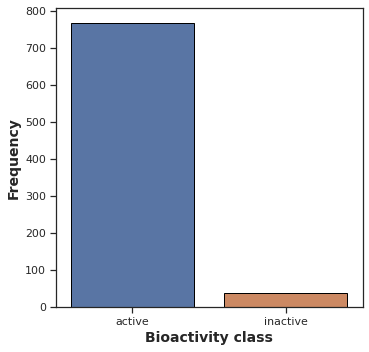

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

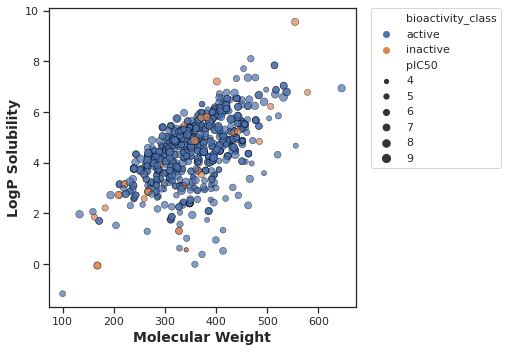

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='M Weight', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('Molecular Weight', fontsize=14, fontweight='bold')
plt.ylabel('LogP Solubility', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

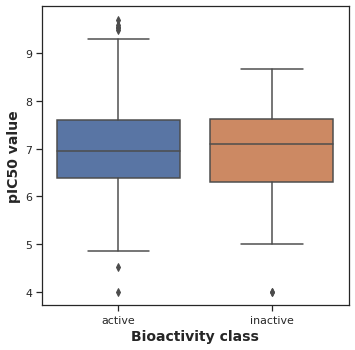

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,14330.5,0.42089,0.05,Same distribution (fail to reject H0)


#### **MW**

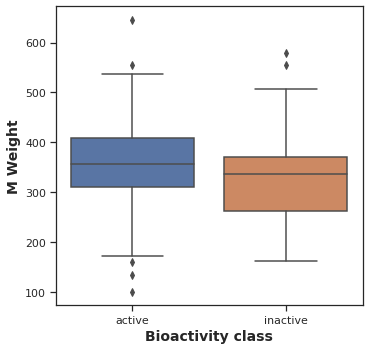

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'M Weight', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('M Weight', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('M Weight')

,Descriptor,Statistics,p,alpha,Interpretation
0,M Weight,10964.5,0.004671,0.05,Different distribution (reject H0)


#### **LogP**

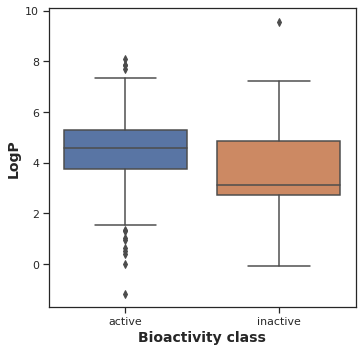

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,9271.5,0.000071,0.05,Different distribution (reject H0)


#### **NumHDonors**

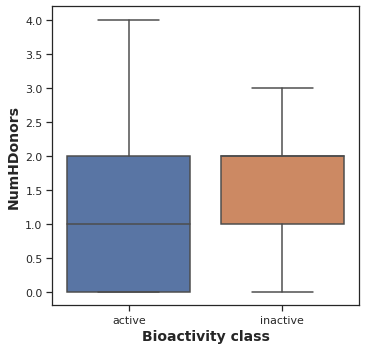

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,9774.5,0.000151,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

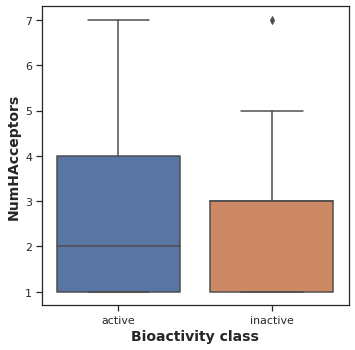

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,14237.5,0.392101,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**
#####NEEEDDDD CORRECTIONSSSSSSS
###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: sigma1_bioactivity_data_preprocessed.csv (deflated 82%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 5%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_MW.pdf (deflated 37%)
  adding: mannwhitneyu_M Weight.csv (deflated 10%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: sigma1_bioactivity_data_preprocessed_pIC50.csv (deflated 78%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
